In [1]:

import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=50, shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root="./data", train = False, download=True, transform=transform)

testloader = torch.utils.data.DataLoader(testset, batch_size = 50, shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck')



Files already downloaded and verified
Files already downloaded and verified


In [19]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [20]:
import matplotlib.pyplot as plt
import random
def plot_figs(num_figs = 10):
    trans = transforms.Compose([transforms.Normalize((-1.,-1.,-1.),(2.,2.,2.)), transforms.ToPILImage()])
    fig, axes = plt.subplots(1, num_figs, figsize=(1 * num_figs, 1))
    num_train = len(trainset)
    random_nums = random.sample(range(num_train), num_figs)
    for i in range(num_figs):
        tmp = trainset[random_nums[i]]
        axes[i].imshow(trans(tmp[0]))
        axes[i].set_title(classes[tmp[1]])
        axes[i].set_xticks([])
        axes[i].set_yticks([])
    plt.show()

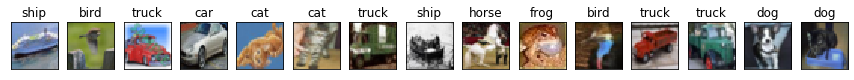

In [21]:
plot_figs(15)

In [22]:
import torch.nn as nn
import torch.nn.functional as F

class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 8, 5)
        self.conv2 = nn.Conv2d(8, 16, 5)
        
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)
        
    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        x = F.max_pool2d(F.relu(self.conv2(x)), (2, 2))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


In [23]:
net = ConvNet()
net.to(device)

ConvNet(
  (conv1): Conv2d(3, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [24]:
import torch.optim as optim

criteria = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr = 0.001, momentum=0.9)

In [25]:
for epoch in range(5):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs, labels = data
        inputs = inputs.to(device)
        labels = labels.to(device)
        
        optimizer.zero_grad()
        
        outputs = net(inputs)
        
        loss = criteria(outputs, labels)
        loss.backward()
        
        optimizer.step()
        
        running_loss += loss.item()
        if i % 2000 == 1999:
            print("[{}, {}], Loss: {}".format(epoch + 1, i + 1, running_loss / 2000.))
            running_loss = 0.0
print("Finished Training")

Finished Training


In [26]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

Actual cat	Predicted: frog
Actual ship	Predicted: ship
Actual ship	Predicted: ship
Actual plane	Predicted: plane


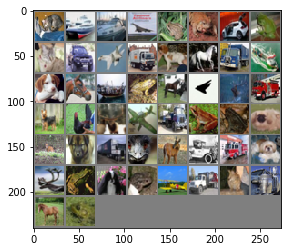

In [27]:
import numpy as np

dataiter = iter(testloader)
images, labels = dataiter.next()
images = images.to(device)
labels = labels.to(device)
    
outputs = net(images)
_, predicted = torch.max(outputs, 1)

imshow(torchvision.utils.make_grid(images.cpu()))
for i in range(4):    
   print("Actual {}\tPredicted: {}".format(classes[labels[i]], classes[predicted[i]]))

In [29]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        images = images.to(device)
        labels = labels.to(device)
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))


Accuracy of the network on the 10000 test images: 45 %
